## 7.  Bridge repair
usinmg only $a+b$ and $a\cdot b$ operations, find out if equations from input can be made correct

Operations should be computed **FROM LEFT TO RIGHT**, not according to precedence rules.

Imma go do that with recursion:
 
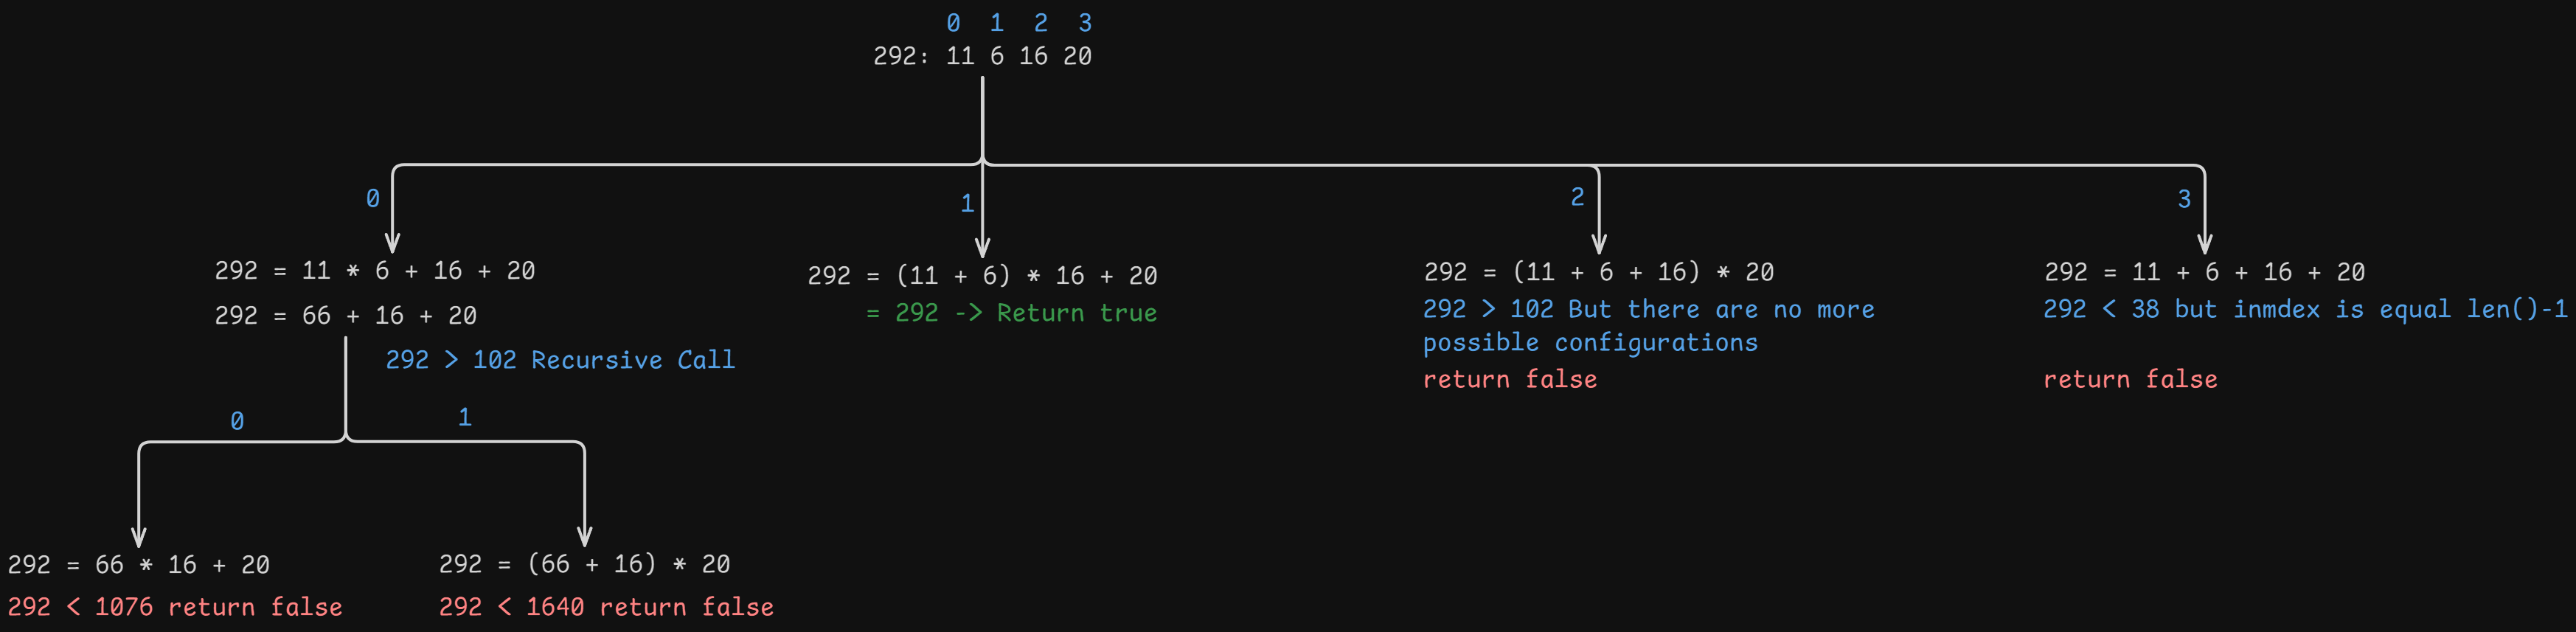

-> This means we need to explore all possible ways to put * into equation and sum the rest
1. Create index
2. Call function with index for range of array length
3. Sum numbers until you get to index and multiply numbers at index
4. Check exit or recurse conditions 


if any of initially called functions returns true, then equation is solvable!


Exit conditions:
1. `Equation = result`
2. `Equation > result`
3. `Equation < result` and `Arr len == 1`
4. `Equation != result`and `index = Arr len - 1`


Recursive call:
- Condition: `Equation < result` and `Arr len > 1`
- Call: New array where fasctors were multiplied and `index`

In [ ]:
import numpy as np


def ComputeIfSolvable(result, operands, index):
    # Building new array
    new_array = []
    print(operands)
    
    if index == 0:
        raise ValueError("Index cannot be 0")
    
    i = 0
    res = 0
    while i < len(operands):
        if i == index:
            prod = res * operands[i]
            # Replace all values lower than index with res
            print(res, "*", operands[i+1], "=", prod)
            res = prod
            new_array = [res]
        
        elif i < len(operands[:-1]):
            res += operands[i] + operands[i+1]
            print(res, "+", operands[i], "=", res)
            
            # All values after product can still be multiplied
            new_array.append(operands[i])        
        else:
            # Also append last value
            new_array.append(operands[i])

        i += 1 # Skip next number in equation
    
    print(new_array, res)
    
    # Checking conditions:
    if res == result:
        return True
    elif res > result:
        return False 
    elif index == len(operands) - 1:
        return False 
    
    
    
    if len(new_array) == 1: # NewArray lengt == 1
        return False 
    elif len(new_array) > 1:
        for i in range(1, len(new_array)):
            print("---")
            return ComputeIfSolvable(result, new_array, i)

# for i in range(1, len([11, 6, 16, 20])):
ComputeIfSolvable(292, [11, 6, 16, 20], 1)

with open("test.txt", "r") as file:
    # map() explained https://www.geeksforgeeks.org/python-map-function/
    data = [[list(map(int, num.split())) for num in line.split(":")] for line in file.readlines()]
    
    

[11, 6, 16, 20]
11 + 6 = 17
17 * 16 = 102
16 + 20 = 138
[102, 16, 20] 138
---
[102, 16, 20]
102 + 16 = 118
118 * 20 = 1888
[1888, 20] 1888


In [1]:
import numpy as np

def ComputePossible(result, partial_result, operands, index):
    
    # print(index, operands)
    print(index)
        
    partial_result += np.sum(operands[:index])
    print(f"Sum({operands[:index]}) = {partial_result}")
    
    if index == len(operands):
        product = partial_result * 1
        print(f"{partial_result} * 1 = {product}")
    else:
        product = partial_result * operands[index]
        print(f"{partial_result} * {operands[index]} = {product}")
        
    full_result = product + np.sum(operands[index+1 :])
    
    
    print(f"{product} + sum({operands[index+1:]}) = {full_result}")
    
    
    # Checking conditions:
    if full_result == result:
        return True
    elif full_result > result:
        return False 
    elif index >= len(operands) - 1:
        return False 
    elif index == 0 and full_result < result:
        return False
    
    remaining_operands = operands[index:]
    
    if len(remaining_operands) == 1: # NewArray lengt == 1
        return False 
    elif len(remaining_operands) > 1:
        for i in range(1, len(remaining_operands)):
            print("---", len(remaining_operands), "---")
            return ComputePossible(result, full_result, remaining_operands, i)

    
    

with open("input.txt", "r") as file:
    # map() explained https://www.geeksforgeeks.org/python-map-function/
    data = [[list(map(int, num.split())) for num in line.split(":")] for line in file.readlines()]
    
    
CalibrationResult = []
for result, operands in data:
    for i in range(1, len(operands)):
        solvable = ComputePossible(result[0], 0, operands, i)
        if solvable:
            CalibrationResult.append(result[0])
            break
            
print()
print("Correct results:", CalibrationResult)
print("Part 1:", sum(CalibrationResult))

# 2 314 469 < 2 323 095 < x 

1
Sum([7]) = 7
7 * 219 = 1533
1533 + sum([8, 44, 2, 9, 3, 2, 6, 4, 1, 6]) = 1618
--- 11 ---
1
Sum([219]) = 1837
1837 * 8 = 14696
14696 + sum([44, 2, 9, 3, 2, 6, 4, 1, 6]) = 14773
--- 10 ---
1
Sum([8]) = 14781
14781 * 44 = 650364
650364 + sum([2, 9, 3, 2, 6, 4, 1, 6]) = 650397
--- 9 ---
1
Sum([44]) = 650441
650441 * 2 = 1300882
1300882 + sum([9, 3, 2, 6, 4, 1, 6]) = 1300913
--- 8 ---
1
Sum([2]) = 1300915
1300915 * 9 = 11708235
11708235 + sum([3, 2, 6, 4, 1, 6]) = 11708257
--- 7 ---
1
Sum([9]) = 11708266
11708266 * 3 = 35124798
35124798 + sum([2, 6, 4, 1, 6]) = 35124817
--- 6 ---
1
Sum([3]) = 35124820
35124820 * 2 = 70249640
70249640 + sum([6, 4, 1, 6]) = 70249657
--- 5 ---
1
Sum([2]) = 70249659
70249659 * 6 = 421497954
421497954 + sum([4, 1, 6]) = 421497965
--- 4 ---
1
Sum([6]) = 421497971
421497971 * 4 = 1685991884
1685991884 + sum([1, 6]) = 1685991891
2
Sum([7, 219]) = 226
226 * 8 = 1808
1808 + sum([44, 2, 9, 3, 2, 6, 4, 1, 6]) = 1885
--- 10 ---
1
Sum([8]) = 1893
1893 * 44 = 83292
832

C:\Users\cenet\AppData\Local\Temp\ipykernel_22980\897741761.py:15: RuntimeWarning: overflow encountered in scalar multiply
  product = partial_result * operands[index]


98 + sum([58, 4]) = 160
--- 3 ---
1
Sum([7]) = 167
167 * 58 = 9686
9686 + sum([4]) = 9690
3
Sum([5, 9, 7]) = 21
21 * 58 = 1218
1218 + sum([4]) = 1222
--- 2 ---
1
Sum([58]) = 1280
1280 * 4 = 5120
5120 + sum([]) = 5120.0
4
Sum([5, 9, 7, 58]) = 79
79 * 4 = 316
316 + sum([]) = 316.0
1
Sum([4]) = 4
4 * 1 = 4
4 + sum([5, 8, 619, 8, 1, 1, 4, 3, 4, 8]) = 665
--- 11 ---
1
Sum([1]) = 666
666 * 5 = 3330
3330 + sum([8, 619, 8, 1, 1, 4, 3, 4, 8]) = 3986
--- 10 ---
1
Sum([5]) = 3991
3991 * 8 = 31928
31928 + sum([619, 8, 1, 1, 4, 3, 4, 8]) = 32576
--- 9 ---
1
Sum([8]) = 32584
32584 * 619 = 20169496
20169496 + sum([8, 1, 1, 4, 3, 4, 8]) = 20169525
2
Sum([4, 1]) = 5
5 * 5 = 25
25 + sum([8, 619, 8, 1, 1, 4, 3, 4, 8]) = 681
--- 10 ---
1
Sum([5]) = 686
686 * 8 = 5488
5488 + sum([619, 8, 1, 1, 4, 3, 4, 8]) = 6136
--- 9 ---
1
Sum([8]) = 6144
6144 * 619 = 3803136
3803136 + sum([8, 1, 1, 4, 3, 4, 8]) = 3803165
3
Sum([4, 1, 5]) = 10
10 * 8 = 80
80 + sum([619, 8, 1, 1, 4, 3, 4, 8]) = 728
--- 9 ---
1
Sum([8]) = 

In [24]:
def Compute(result, operands, depth=0):
    if len(operands) == 1:
        return result == operands[-1] # IF LAST OPERAND IS EQUAL TO RESULT, THEN EQUATION IS SOLVABLE
    
    if result % operands[-1] == 0 and Compute(result / operands[-1], operands[:-1], depth+1):
        return True
    elif result - operands[-1] >= 0 and Compute(result - operands[-1], operands[:-1], depth+1):
        return True
    else:
        return False

def Concat(a, b):
    return int(str(a) + str(b))
    
def Compute2(result, operands, depth=0):
    if len(operands) == 1:
        return result == operands[-1] # IF LAST OPERAND IS EQUAL TO RESULT, THEN EQUATION IS SOLVABLE
    
    if result % operands[-1] == 0 and Compute2(result / operands[-1], operands[:-1], depth+1):
        return True
    elif result - operands[-1] >= 0 and Compute2(result - operands[-1], operands[:-1], depth+1):
        return True
    
    str_result = str(int(result))
    str_operand = str(int(operands[-1]))

    if len(str_result) > len(str_operand) \
        and str_result[-len(str_operand):] == str_operand: # Chechk whatever last digit of current value are same as last operand
        return Compute2(int(str_result[: -len(str_operand)]), operands[: -1], depth+1)
    
    return False
    
with open("input.txt", "r") as file:
    # map() explained https://www.geeksforgeeks.org/python-map-function/
    data = [[list(map(int, num.split())) for num in line.split(":")] for line in file.readlines()]
    
    
CalibrationResult1 = []
CalibrationResult2 = []
for result, operands in data:
    solvable = Compute(result[0], operands, 0)
    if solvable:
        CalibrationResult1.append(result[0])
    
    solvable2 = Compute2(result[0], operands, 0)
    if solvable2:
        CalibrationResult2.append(result[0])

    
    
print()
print("Correct results:", CalibrationResult1)
print("Correct results:", CalibrationResult2)
print("Part 1:", sum(CalibrationResult1))
print("Part 2:", sum(CalibrationResult2))



Correct results: [1957116, 198050, 467, 7316189440, 33138, 1215195700, 318936618, 2102812, 274540788, 1427032798, 480, 4991679, 940, 5659883, 1671942, 2011, 9094800, 234179567, 13394703, 159408, 134142820, 2522113308, 6771960, 318124, 4129352, 30132480, 7929094, 14816, 236, 31344, 178893876, 4517, 1014255, 16625917453, 21408695, 44521661, 10437926, 4293432, 87417, 73338720, 126, 147888, 193516984, 1175, 77262, 5458120200000, 683299, 12178755, 4635323000, 182358, 2024734, 552808080, 275832, 144618480, 2550199, 4867527232, 2908919, 29609, 245700, 367, 30661956, 1072, 21580, 3837946112, 1418, 30118881, 8569194, 2397863, 24256960, 22569840, 5752, 67269, 6172980, 187757, 29106, 243818, 90209784, 120768, 1132216, 22172, 2862201, 3370, 7477875, 17145951, 8476, 1737558, 7137940, 375924, 174783, 450081, 1580629050, 53908033, 411113430, 11447010, 9591544, 335, 294451, 72, 36909183, 14732109, 2499735, 18438, 12209400, 38034, 15031, 1818, 5159414, 943, 13344, 2845227, 5561933, 27842, 767760, 5836

In [8]:
def is_doable_part2(val: int, nums: list[int]) -> bool:
    # Empty lists are ambiguous and don't occur
    # Base case is length 1
    if len(nums) == 1:
        return val == nums[0]

    if val % nums[-1] == 0 and is_doable_part2(val // nums[-1], nums[:-1]):
        return True
    if val - nums[-1] >= 0 and is_doable_part2(val - nums[-1], nums[:-1]):
        return True

    # Concatenation asks if val % 10^(whatever) == nums[-1]
    # The 10^(whatever) part we'll just do with str operator and be lazy
    str_num = str(nums[-1])
    str_val = str(val)

    if len(str_val) > len(str_num) and str_val[-len(str_num) :] == str_num:
        str_val = str_val[: -len(str_num)]
        return is_doable_part2(int(str_val), nums[:-1])

    return False

is_doable_part2(156, [15, 6])

True

In [3]:
str_val = "56"
str_num = "10"

str_val[-len(str_num) :] == str_num


False